In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
db = pd.read_csv("../../DataSets/diabetes.csv")

In [122]:
db.head(6)

,preg,glucose,bp_diastolic,skin_triceps,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


In [123]:
cols=list(db.columns) 
print(cols)

['preg', 'glucose', 'bp_diastolic', 'skin_triceps', 'insulin', 'bmi', 'pedigree', 'age', 'label']


In [124]:
db.shape

(768, 9)

<Axes: >

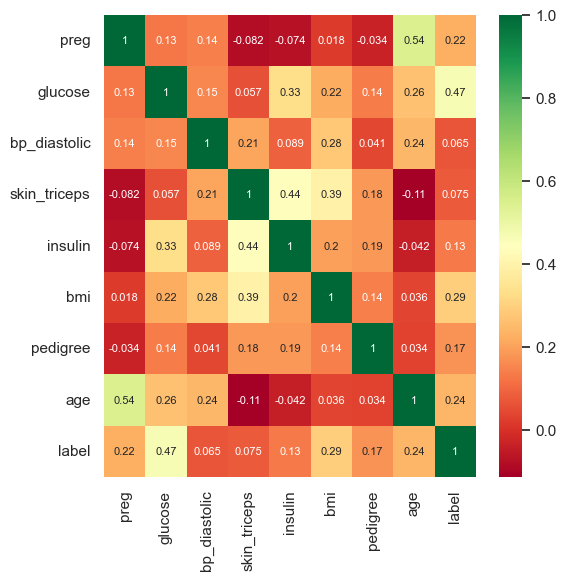

In [125]:
#get correlations of each features in datoset
corrmat = db.corr() 
top_corr_features = corrmat.index 
plt.figure(figsize=(6,6)) 
#plot heat map 
sns.heatmap(db[top_corr_features].corr(), annot= True, cmap="RdYlGn", annot_kws={'fontsize':8})

In [126]:
feature_cols = ['preg', 'glucose','insulin', 'bmi', 'pedigree', 'age']
print(feature_cols)

['preg', 'glucose', 'insulin', 'bmi', 'pedigree', 'age']


In [127]:
db.columns.drop

<bound method Index.drop of Index(['preg', 'glucose', 'bp_diastolic', 'skin_triceps', 'insulin', 'bmi',
       'pedigree', 'age', 'label'],
      dtype='object')>

In [128]:
db.columns

Index(['preg', 'glucose', 'bp_diastolic', 'skin_triceps', 'insulin', 'bmi',
       'pedigree', 'age', 'label'],
      dtype='object')

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
#dataframe
X= db[feature_cols] #features column(X)
#series
y = db.label #.label done when one word column name(Y)-->label is basically a deciosn based on inputs
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 30)

In [131]:
def applyRegAlgo(algo, dpth =3, rdms= 10):
        if algo == 'DTreeR':
            from sklearn.tree import DecisionTreeRegressor
            rgrsr = DecisionTreeRegressor(random_state=rdms, max_depth = dpth)
        elif algo == 'KNNR':
            from sklearn import neighbors
            rgrsr = neighbors.KNeighborsRegressor(n_neighbors = dpth)
        elif algo =='RFR':
            from sklearn.ensemble import RandomForestRegessor
            rgrsr = RandomForestRegesso(n_estimators = dpth, random_state = rdms)
        elif algo == "LR":
            from sklearn.linear_model import LinearRegression
            rgrsr = LinearRegression()
        return rgrsr

In [132]:
rgrsr = applyRegAlgo('DTreeR')

In [133]:
len(y_train)

576

In [134]:
len(y_test)

192

In [135]:
from sklearn.tree import DecisionTreeClassifier# get libarary and define classifier parameters
# Create Decision Tree Classifier Object
clf = DecisionTreeClassifier(criterion = "entropy", max_depth = 4)

In [136]:
# Train Classifier
model = rgrsr.fit(X_train,y_train)

In [137]:
rgrsr 

DecisionTreeRegressor(max_depth=3, random_state=10)

In [138]:
#predict the response for the test dataset
y_pred= model.predict(X_test)

In [139]:
len(y_pred)

192

In [140]:
len(y_test)

192

In [141]:
y = pd.DataFrame({'Original':y_test,'Predicted': y_pred})
y.head()

,Original,Predicted
226,0,0.071770
610,0,0.071770
505,0,0.449153
470,0,0.606742
474,0,0.071770


NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

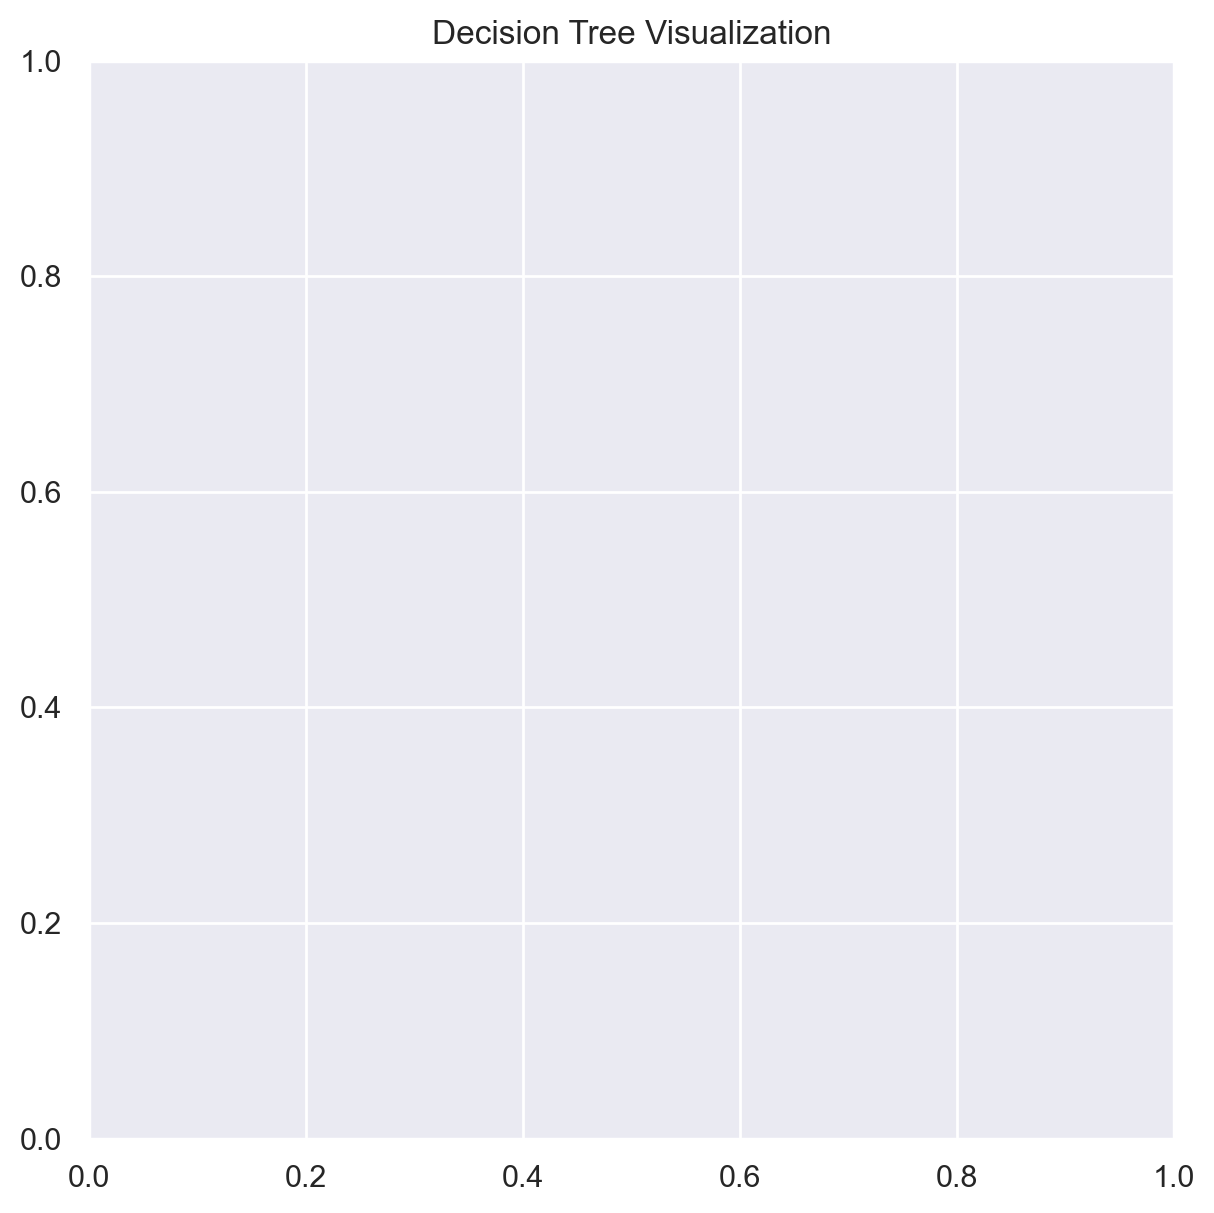

In [142]:
from sklearn import tree
#plot the decison tree with customizations
plt.figure(figsize = (7,7), dpi = 200)
plt.title("Decision Tree Visualization")
tree.plot_tree(clf, filled = True, feature_names = X_train.columns, class_names = True, fontsize = 4, max_depth =4, node_ids =True);

In [ ]:
from sklearn import metrics

In [ ]:
result = metrics.confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(result)

In [ ]:
def plt1():
    import seaborn as sns; sns.set()
    plt.figure(figsize = (4,4))
    c_mtrx = pd.crosstab(y_test, y_pred, rownames = ['Actual'],colnames = ['Predicted']) # metrix report is also called crosstb report
    sns.heatmap(c_mtrx, annot = True, fmt = '.3g')

In [ ]:
plt1()

In [ ]:
#rowmcolumn]
#[Actual,Predict]
TN = result[0,0]; FP = result[0,1];
FN = result[1,0]; TP = result[1,1];
print('TN: ',TN, '\t FP: ',FP) 
print('FN: ',FN, '\t TP: ',TP)

In [143]:
print('Metrics computed from a confusion matrix')
print("Accuracy:\t", metrics.accuracy_score(y_test, y_pred))
print("Sensitivity:\t", metrics.recall_score(y_test, y_pred))
print("Specificity:\t",TN / (TN + FP))
print("Precision:\t", metrics.precision_score(y_test, y_pred))
print("Classification Eerror:", 1 - metrics.accuracy_score(y_test, y_pred))
print("False_Positive_Rate:", 1 - TN / (TN + FP))

Metrics computed from a confusion matrix


ValueError: Classification metrics can't handle a mix of binary and continuous targets